In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
customers = pd.read_excel('/content/E-commerce_data.xlsx'   ,sheet_name='customers' , engine='openpyxl' )
genders = pd.read_excel('/content/E-commerce_data.xlsx'     , sheet_name='genders' , engine='openpyxl' )
cities = pd.read_excel('/content/E-commerce_data.xlsx'      , sheet_name='cities' , engine='openpyxl' )
transactions = pd.read_excel('/content/E-commerce_data.xlsx' ,sheet_name='transactions' , engine='openpyxl' )
branches = pd.read_excel('/content/E-commerce_data.xlsx'    , sheet_name='branches' ,  engine='openpyxl' )
merchants = pd.read_excel('/content/E-commerce_data.xlsx'   , sheet_name='merchants' , engine='openpyxl' )

In [227]:
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


In [228]:
genders.head()

,gender_id,gender_name
0,1,Male
1,2,Female


In [229]:
cities.head()

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said


In [230]:
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6


In [231]:
branches.head()

,branch_id,merchant_id
0,1,11
1,2,18
2,3,8
3,4,15
4,5,9


In [232]:
merchants.head()

,merchant_id,merchant_name
0,1,Rivas Group
1,2,Peters-Acosta
2,3,"Duran, Perry and Stout"
3,4,Morton Ltd
4,5,Curtis-Fields


In [233]:
data = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name=None , engine='openpyxl' )
data

{'customers':      customer_id  join_date  city_id  gender_id
 0              1 2022-01-08        7          1
 1              2 2023-05-02       20          2
 2              3 2023-05-14       15          1
 3              4 2022-11-25       11          2
 4              5 2023-04-26        8          1
 ..           ...        ...      ...        ...
 995          996 2022-10-28        3          1
 996          997 2022-07-07       20          2
 997          998 2024-03-09       11          2
 998          999 2022-07-16        6          1
 999         1000 2024-04-08        2          2
 
 [1000 rows x 4 columns],
 'genders':    gender_id gender_name
 0          1        Male
 1          2      Female,
 'cities':     city_id            city_name
 0         1                Cairo
 1         2           Alexandria
 2         3                 Giza
 3         4     Shubra El-Kheima
 4         5            Port Said
 5         6                 Suez
 6         7             Mansoura

In [234]:
data1 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='customers' , engine='openpyxl' )
data2 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='genders' , engine='openpyxl' )
data3 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='cities' , engine='openpyxl' )
data4 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='transactions' , engine='openpyxl' )
data5 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='branches' , engine='openpyxl' )
data6 = pd.read_excel('/content/E-commerce_data.xlsx' , sheet_name='merchants' , engine='openpyxl' )

## **Collection_Data**

In [235]:
data4 = pd.merge(data4, data1[['customer_id' , 'gender_id' , 'city_id']] , how='left')

In [236]:
data4.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,gender_id,city_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2,14
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,1,2
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2,15
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,1,14


In [237]:
data5 = pd.merge(data6, data5[['merchant_id']], on='merchant_id', how='right')

In [238]:
data5.head()

,merchant_id,merchant_name
0,11,"Smith, Lawson and Hernandez"
1,18,Lewis LLC
2,8,Medina-Foster
3,15,Butler-Gomez
4,9,"Campbell, Shaffer and Martinez"


In [239]:
data4 = pd.merge(data4, data5 ,  how='cross')

In [240]:
data4.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,gender_id,city_id,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,11,"Smith, Lawson and Hernandez"
1,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,18,Lewis LLC
2,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,8,Medina-Foster
3,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,15,Butler-Gomez
4,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,9,"Campbell, Shaffer and Martinez"


In [241]:
new_data = data4.iloc[: , 0:10]
new_data.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,gender_id,city_id,merchant_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,11
1,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,18
2,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,8
3,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,15
4,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2,15,9


## **Missing_Values**

In [242]:
new_data.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_date,0
transaction_status,0
coupon_name,0
burn_date,24840
branch_id,0
gender_id,0
city_id,0
merchant_id,0


In [243]:
new_data['burn_date'] = new_data['burn_date'].fillna('15-09-2024')

In [244]:
new_data.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_date,0
transaction_status,0
coupon_name,0
burn_date,0
branch_id,0
gender_id,0
city_id,0
merchant_id,0


## **Duplicate_Values**

In [245]:
new_data = new_data.drop(['coupon_name', 'burn_date' , 'transaction_date'] , axis = 1)

In [246]:
new_data.head()

,transaction_id,customer_id,transaction_status,branch_id,gender_id,city_id,merchant_id
0,1,733,subscribed,7,2,15,11
1,1,733,subscribed,7,2,15,18
2,1,733,subscribed,7,2,15,8
3,1,733,subscribed,7,2,15,15
4,1,733,subscribed,7,2,15,9


In [247]:
new_data.duplicated().sum()

10000

In [248]:
new_data = new_data.drop_duplicates()

In [249]:
new_data.duplicated().sum()

0

In [250]:
new_data.shape

(40000, 7)

In [251]:
new_data.head(10)

,transaction_id,customer_id,transaction_status,branch_id,gender_id,city_id,merchant_id
0,1,733,subscribed,7,2,15,11
1,1,733,subscribed,7,2,15,18
2,1,733,subscribed,7,2,15,8
3,1,733,subscribed,7,2,15,15
4,1,733,subscribed,7,2,15,9
6,1,733,subscribed,7,2,15,7
7,1,733,subscribed,7,2,15,20
8,1,733,subscribed,7,2,15,13
10,2,631,burned,5,2,14,11
11,2,631,burned,5,2,14,18


## **Encoding**

In [252]:
new_data = pd.get_dummies(new_data)

In [253]:
new_data.head()

,transaction_id,customer_id,branch_id,gender_id,city_id,merchant_id,transaction_status_burned,transaction_status_subscribed
0,1,733,7,2,15,11,False,True
1,1,733,7,2,15,18,False,True
2,1,733,7,2,15,8,False,True
3,1,733,7,2,15,15,False,True
4,1,733,7,2,15,9,False,True


## **Data_Visulization**

### The Percentage of **Gender_Name**

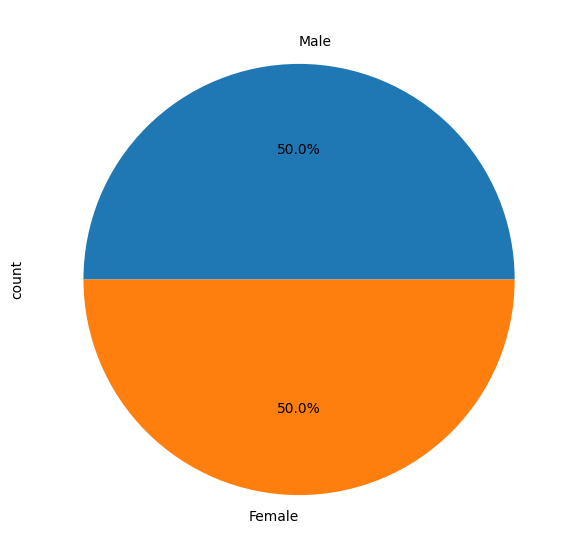

In [372]:
figsize = (7, 7)
plt.figure(figsize=figsize)
data2['gender_name'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()

### The Relationship of Customer_ID to **Gender_ID**

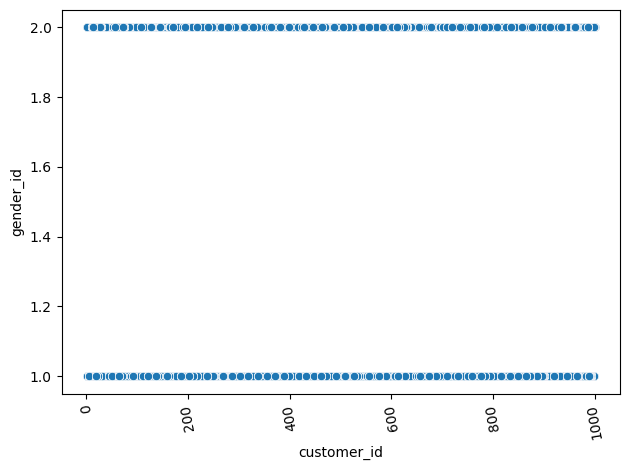

In [396]:
import seaborn as sns
sns.scatterplot(x=new_data["customer_id"], y=new_data["gender_id"])
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

### The **Percentage** of Transaction_Status

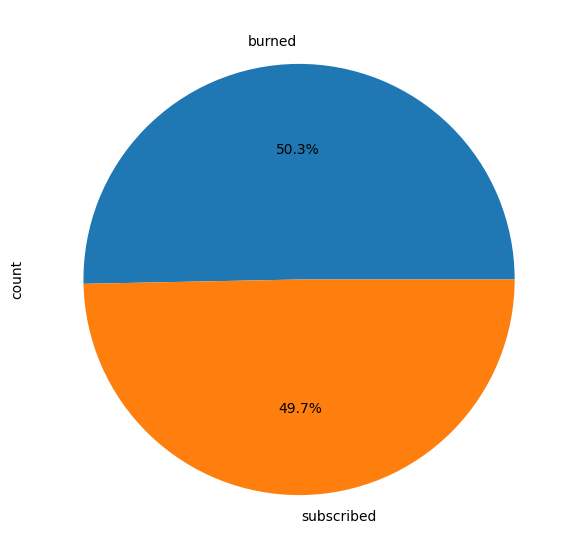

In [394]:
figsize = (7, 7)
plt.figure(figsize=figsize)
data4['transaction_status'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.show()

### The Relationship of Merchant_ID to **Transaction_ID**

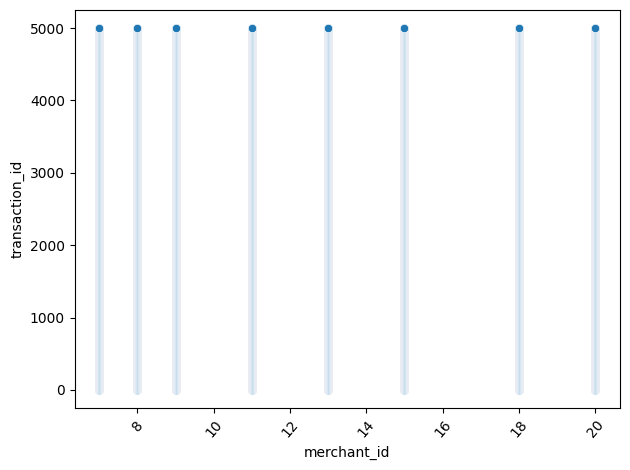

In [391]:
import seaborn as sns
sns.scatterplot(x=new_data["merchant_id"], y=new_data["transaction_id"])
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

### **Heat_Map**

<Axes: >

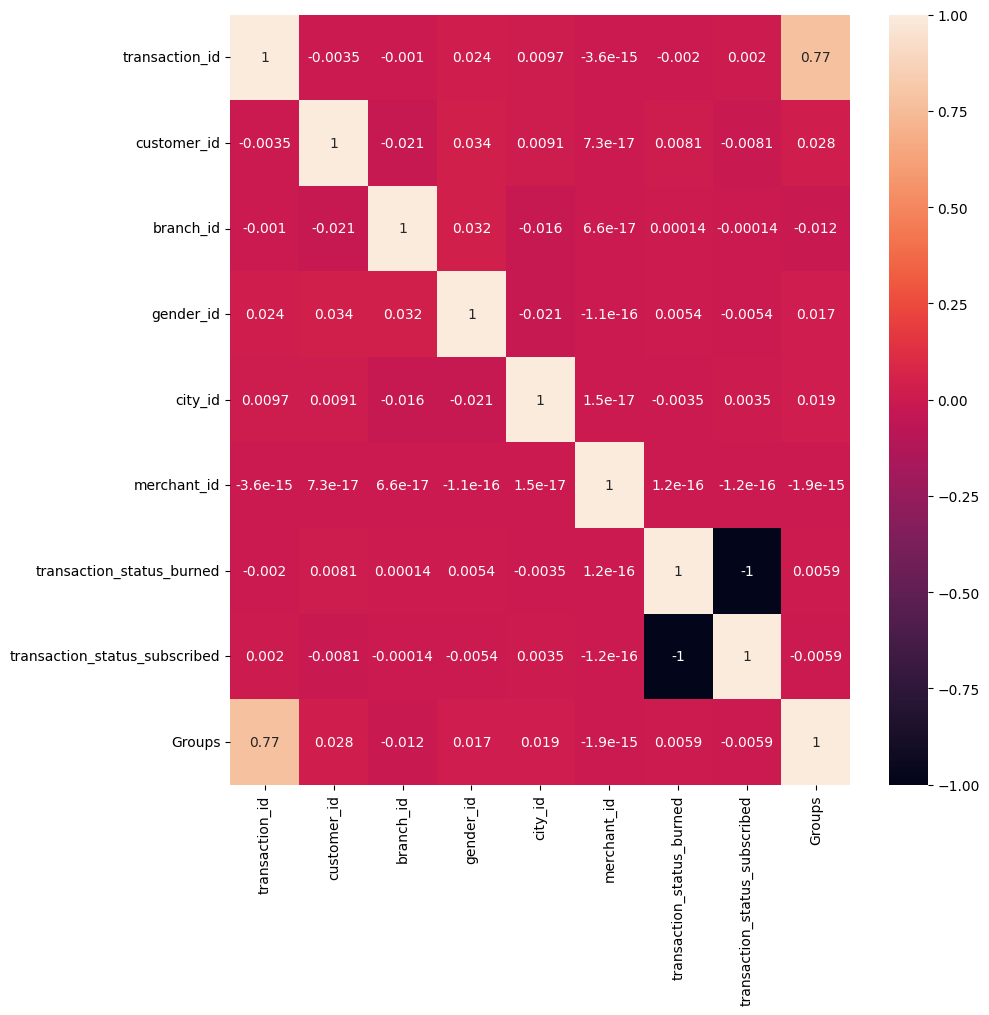

In [367]:
plt.figure(figsize=(10, 10))
sns.heatmap(new_data.corr() , annot=True)

## **Clustering**

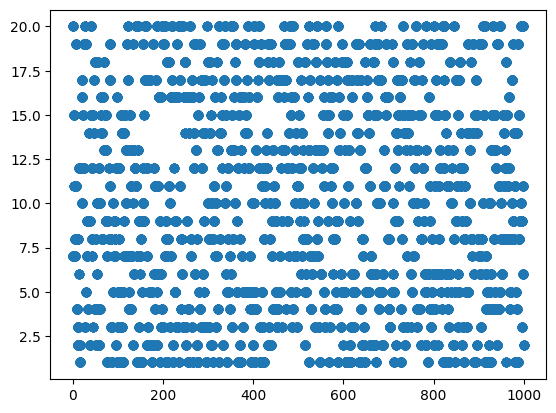

In [257]:
plt.scatter(new_data.iloc[:, 1:2],   new_data.iloc[:, 4:5])
plt.show()

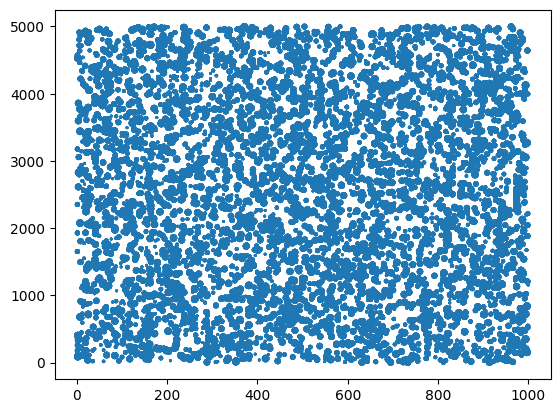

In [275]:
plt.scatter(new_data.iloc[:, 1:2], new_data.iloc[:, 0:1], new_data.iloc[:, 4:5])
plt.show()

## **Taking the Features only**

In [263]:
x = new_data
x.head()

,transaction_id,customer_id,branch_id,gender_id,city_id,merchant_id,transaction_status_burned,transaction_status_subscribed
0,1,733,7,2,15,11,False,True
1,1,733,7,2,15,18,False,True
2,1,733,7,2,15,8,False,True
3,1,733,7,2,15,15,False,True
4,1,733,7,2,15,9,False,True


## Visualize the **data**

In [276]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [277]:
print(wcss)

[86631455631.88608, 24131412085.124348, 12557653562.150467, 8502886521.056072, 6628458343.106132, 5612776512.331149, 5002046705.803875, 4580078137.404387, 4147727135.6657186, 3747998842.2205105]


## Selection the Right Number of **Clusters**

Text(0.5, 0, 'Number of clusters')

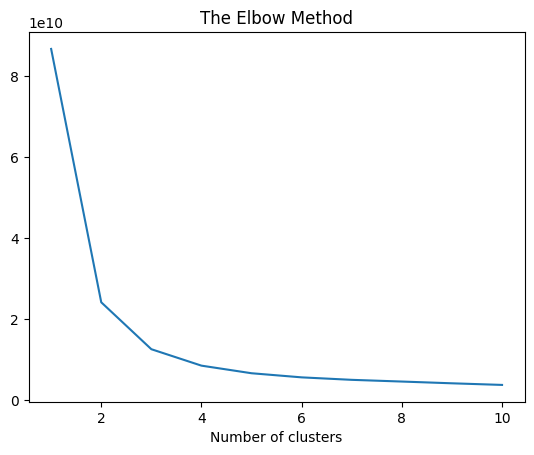

In [278]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

In [286]:
model = KMeans(n_clusters=4)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [310]:
y = model.predict(x)

In [311]:
x['Groups'] =y

In [312]:
x

,transaction_id,customer_id,branch_id,gender_id,city_id,merchant_id,transaction_status_burned,transaction_status_subscribed,Groups
0,1,733,7,2,15,11,False,True,0
1,1,733,7,2,15,18,False,True,0
2,1,733,7,2,15,8,False,True,0
3,1,733,7,2,15,15,False,True,0
4,1,733,7,2,15,9,False,True,0
...,...,...,...,...,...,...,...,...,...
49993,5000,371,6,1,16,15,False,True,3
49994,5000,371,6,1,16,9,False,True,3
49996,5000,371,6,1,16,7,False,True,3
49997,5000,371,6,1,16,20,False,True,3


In [313]:
x.to_csv('cluster_E-Commerce.csv')

In [314]:
new_data['Groups'] =y

In [331]:
Group0 = []
Group1 = []
Group2 = []
Group3 = []

for i in new_data['Groups'].index:
  if new_data['Groups'][i] == 0:
    Group0.append(new_data['customer_id'][i])
  elif new_data['Groups'][i] == 1:
    Group1.append(new_data['customer_id'][i])
  elif new_data['Groups'][i] == 2:
    Group2.append(new_data['customer_id'][i])
  elif new_data['Groups'][i] == 3:
    Group3.append(new_data['customer_id'][i])

In [332]:
Group0

[733,
 733,
 733,
 733,
 733,
 733,
 733,
 733,
 631,
 631,
 631,
 631,
 631,
 631,
 631,
 631,
 309,
 309,
 309,
 309,
 309,
 309,
 309,
 309,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 288,
 288,
 288,
 288,
 288,
 288,
 288,
 288,
 307,
 307,
 307,
 307,
 307,
 307,
 307,
 307,
 812,
 812,
 812,
 812,
 812,
 812,
 812,
 812,
 594,
 594,
 594,
 594,
 594,
 594,
 594,
 594,
 966,
 966,
 966,
 966,
 966,
 966,
 966,
 966,
 914,
 914,
 914,
 914,
 914,
 914,
 914,
 914,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 662,
 662,
 662,
 662,
 662,
 662,
 662,
 662,
 549,
 549,
 549,
 549,
 549,
 549,
 549,
 549,
 352,
 352,
 352,
 352,
 352,
 352,
 352,
 352,
 312,
 312,
 312,
 312,
 312,
 312,
 312,
 312,
 873,
 873,
 873,
 873,
 873,
 873,
 873,
 873,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 924,
 924,
 924,
 924,
 924,
 924,
 924,
 924,
 714,
 714,
 714,
 714,
 714,
 714,
 714,
 714,
 755,
 755,
 755,
 755,
 755,
 755,
 755,
 755,


In [333]:
Group0 = pd.Series(Group0)
Group0.duplicated().sum()
Group0 = Group0.drop_duplicates()
Group0.duplicated().sum()

0

In [334]:
Group0

,0
0,733
8,631
16,309
24,695
32,288
...,...
9888,47
9904,710
9920,78
9936,75


In [335]:
Group1

[241,
 241,
 241,
 241,
 241,
 241,
 241,
 241,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 294,
 294,
 294,
 294,
 294,
 294,
 294,
 294,
 209,
 209,
 209,
 209,
 209,
 209,
 209,
 209,
 343,
 343,
 343,
 343,
 343,
 343,
 343,
 343,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 88,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 390,
 325,
 325,
 325,
 325,
 325,
 325,
 325,
 325,
 940,
 940,
 940,
 940,
 940,
 940,
 940,
 940,
 889,
 889,
 889,
 889,
 889,
 889,
 889,
 889,
 832,
 832,
 832,
 832,
 832,
 832,
 832,
 832,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 668,
 668,
 668,
 668,
 668,
 668,
 668,
 668,
 651,
 651,
 651,
 651,
 651,
 651,
 651,
 651,
 633,
 633,
 633,
 633,
 633,
 633,
 633,
 633,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 619,
 619,
 619,
 619,
 619,
 619,
 619,
 619,
 659,
 659,
 659,
 659,
 659,
 659,
 659,
 659,
 137,
 137,
 137,
 137,
 137,
 137,
 137,
 137,
 923,
 923,
 923,
 923,
 923,
 923,
 923,
 923,
 674,
 6

In [337]:
Group1 = pd.Series(Group1)
Group1.duplicated().sum()
Group1 = Group1.drop_duplicates()
Group1.duplicated().sum()

0

In [338]:
Group1

,0
0,241
8,154
16,96
24,294
32,209
...,...
9760,234
9776,11
9872,664
9880,584


In [306]:
Group2

[936,
 936,
 936,
 936,
 936,
 936,
 936,
 936,
 925,
 925,
 925,
 925,
 925,
 925,
 925,
 925,
 946,
 946,
 946,
 946,
 946,
 946,
 946,
 946,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 354,
 499,
 499,
 499,
 499,
 499,
 499,
 499,
 499,
 758,
 758,
 758,
 758,
 758,
 758,
 758,
 758,
 897,
 897,
 897,
 897,
 897,
 897,
 897,
 897,
 930,
 930,
 930,
 930,
 930,
 930,
 930,
 930,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 93,
 944,
 944,
 944,
 944,
 944,
 944,
 944,
 944,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 239,
 205,
 205,
 205,
 205,
 205,
 205,
 205,
 205,
 560,
 560,
 560,
 560,
 560,
 560,
 560,
 560,
 433,
 433,
 433,
 433,
 433,
 433,
 433,
 433,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 832,
 832,
 832,
 832,
 832,
 832,
 832,
 832,
 317,
 317,
 317,
 317,
 317,
 317,
 317,
 317,
 925,
 925,
 925,
 925,
 925,
 925,
 925,
 925,
 295,
 295,
 295,
 295,
 295,
 295,
 295,
 295,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 856,
 856,
 856,
 856,
 856,
 856,
 856,
 856,


In [339]:
Group2 = pd.Series(Group2)
Group2.duplicated().sum()
Group2 = Group2.drop_duplicates()
Group2.duplicated().sum()

0

In [340]:
Group2

,0
0,987
8,871
16,602
24,400
32,837
...,...
9816,12
9824,631
9904,716
9920,591


In [307]:
Group3

[733,
 733,
 733,
 733,
 733,
 733,
 733,
 733,
 631,
 631,
 631,
 631,
 631,
 631,
 631,
 631,
 309,
 309,
 309,
 309,
 309,
 309,
 309,
 309,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 695,
 288,
 288,
 288,
 288,
 288,
 288,
 288,
 288,
 307,
 307,
 307,
 307,
 307,
 307,
 307,
 307,
 812,
 812,
 812,
 812,
 812,
 812,
 812,
 812,
 594,
 594,
 594,
 594,
 594,
 594,
 594,
 594,
 966,
 966,
 966,
 966,
 966,
 966,
 966,
 966,
 914,
 914,
 914,
 914,
 914,
 914,
 914,
 914,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 723,
 662,
 662,
 662,
 662,
 662,
 662,
 662,
 662,
 549,
 549,
 549,
 549,
 549,
 549,
 549,
 549,
 352,
 352,
 352,
 352,
 352,
 352,
 352,
 352,
 312,
 312,
 312,
 312,
 312,
 312,
 312,
 312,
 873,
 873,
 873,
 873,
 873,
 873,
 873,
 873,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 643,
 924,
 924,
 924,
 924,
 924,
 924,
 924,
 924,
 714,
 714,
 714,
 714,
 714,
 714,
 714,
 714,
 755,
 755,
 755,
 755,
 755,
 755,
 755,
 755,


In [341]:
Group3 = pd.Series(Group3)
Group3.duplicated().sum()
Group3 = Group3.drop_duplicates()
Group3.duplicated().sum()

0

In [342]:
Group3

,0
0,936
8,925
16,946
24,758
32,897
...,...
9872,284
9880,864
9912,771
9936,792


In [343]:
print(y)

[0 0 0 ... 3 3 3]


## Visualizing the Final **results**

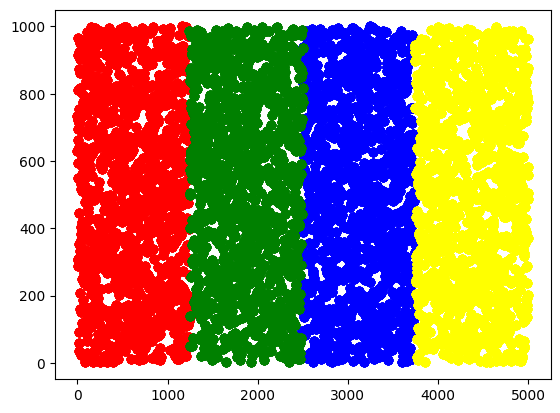

In [346]:
plt.scatter(x[y == 0].iloc[:, 0] , x[y == 0].iloc[:, 1] , c='red') # Use .iloc to select columns by position after boolean indexing
plt.scatter(x[y == 1].iloc[:, 0] , x[y == 1].iloc[:, 1] , c='blue')
plt.scatter(x[y == 2].iloc[:, 0] , x[y == 2].iloc[:, 1] , c='green')
plt.scatter(x[y == 3].iloc[:, 0] , x[y == 3].iloc[:, 1] , c='yellow')
plt.show()

## **Deployment**

In [358]:
customer_id = int(input('Enter Customer_ID : '))
cities_name = int(input('Enter Cities_ID : '))
gender_id = int(input('Enter Gender_ID : '))
new_point = [[customer_id , cities_name ]]
your_group = model.predict(new_point)
print(your_group)

Enter Customer_ID : 100
Enter Cities_ID : 2
Enter Gender_ID : 0
[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [366]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

le = LabelEncoder()
# Fit the encoder to the "Cities_Name" column
le.fit(data3['city_name'])

# Transform the "Cities_Name" column to numerical values
data3['city_name'] = le.transform(data3['city_name'])

# Now you can use the transformed data to fit your KMeans model
model = KMeans(n_clusters=4)
model.fit(data3)

customer_id = int(input('Enter Customer_ID : '))
cities_name = str(input('Enter City_Name : '))
cities_name_encoded = le.transform([cities_name])[0]
gender_id = int(input('Enter Gender_ID : '))
new_point = [[customer_id , cities_name_encoded]]
your_group = model.predict(new_point)
print(your_group)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Enter Customer_ID : 1000
Enter City_Name : 15
Enter Gender_ID : 1
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
